In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import shapely
import geopandas as gpd

import quickplot as qp

In [33]:
election = gpd.read_file('election-map.geojson')
election.columns

Index(['FID', 'dem', 'dempc', 'geometry', 'gop', 'goppc', 'grn', 'lib',
       'margin', 'name', 'newstate', 'oth', 'population', 'state', 'una',
       'votes'],
      dtype='object')

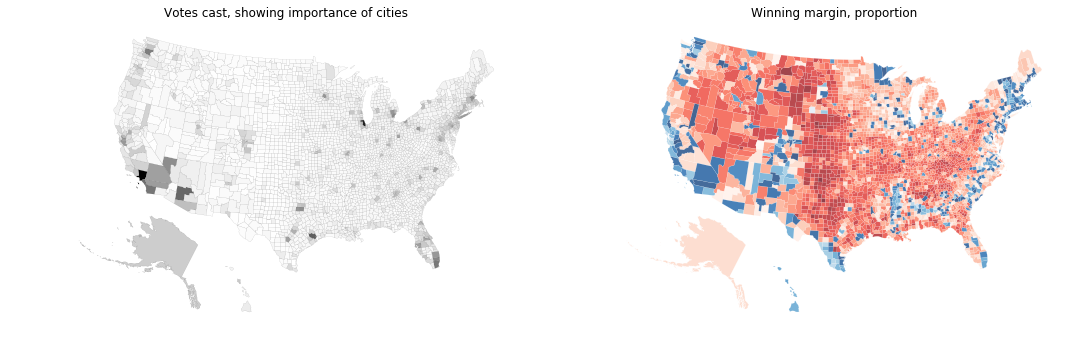

In [34]:
fig = plt.figure(figsize=(18,8))

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Votes cast, showing importance of cities')
election['votes2'] = np.sqrt(election.votes)
qp.quickplot(election, column='votes2', cmap='Greys', alpha=1, edgecolor='k', linewidth=0.05)

ax = plt.subplot(122)
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('Winning margin, proportion')
qp.quickplot(election[election.margin>0], column='margin', cmap='Reds', edgecolor='w', alpha=0.75, linewidth=0.15)
qp.quickplot(election[election.margin<=0], column='margin', cmap='Blues', edgecolor='w', alpha=0.75, linewidth=0.15)


In [39]:
# Make states from counties data c, 
# based on named state ID variable
def make_states(counties, state='state'):
    states = counties.dissolve(by=state, aggfunc='sum', as_index=False)
    # recalculate the proportion-based variables
    # since these don't combine by summation
    states.dempc = states.dem / states.votes
    states.goppc = states.gop / states.votes
    states.margin = states.goppc - states.dempc
    # add a variable to flag the winner
    # in each state - we'll assume D/R
    states['win'] = 'D'
    states.loc[states.gop > states.dem, 'win'] = 'R'
    return states

In [40]:
states = make_states(election, state='state')
states.head()

,state,geometry,FID,dem,dempc,gop,goppc,grn,lib,margin,oth,population,una,votes,votes2,win
0,AK,(POLYGON ((-1882164.772212857 419730.666193547...,2001,93007,0.377176,130415,0.528878,4445,14593,0.151702,4128,710231,0,246588,496.576278,R
1,AL,"POLYGON ((998843.1210250946 935438.8258693079,...",71489,718084,0.345538,1306925,0.628884,9287,43869,0.283347,0,4779736,0,2078165,10183.494266,R
2,AR,"POLYGON ((439573.2907305224 1177002.465449736,...",380625,378729,0.341624,677904,0.611487,9837,29518,0.269864,12627,2915918,0,1108615,7833.590050,R
3,AZ,POLYGON ((-1365876.729939255 1021579.408853245...,60208,936250,0.453871,1021154,0.495031,25255,80151,0.041159,0,6392017,0,2062810,4031.442085,R
4,CA,(POLYGON ((-2077428.848194205 1354705.72972257...,351364,7230699,0.616243,3841134,0.327364,215694,394239,-0.288879,51757,37253956,0,11733523,19400.883465,D


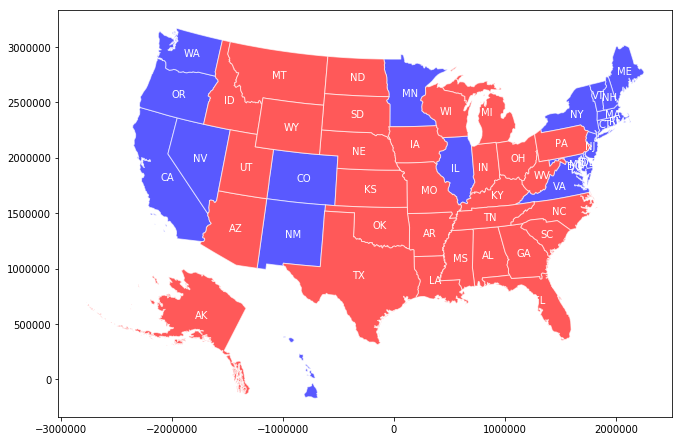

In [52]:
# plot those states
fig, ax = plt.subplots(figsize=(11,8))
ax.set_aspect('equal')
for p, t in zip(states.geometry, states.state):
    ax.annotate(xy=(p.centroid.x-60000, p.centroid.y-30000), s=t, color='w')
qp.quickplot(states[states.win=='D'], facecolor='b', alpha=0.65, edgecolor='w', linewidth=1)
qp.quickplot(states[states.win=='R'], facecolor='r', alpha=0.65, edgecolor='w', linewidth=1)

In [15]:
import randomstates as rs

In [29]:
election['newstate'] = rs.random_states(election)
states = make_states(election, st='newstate')
states['ev'] = rs.apportion(states.population, states.newstate)
gop_ev = sum(states.ev[states.win == 'R']) 
dem_ev = sum(states.ev[states.win == 'D'])
print(gop_ev, dem_ev)

/Users/dosullivan/anaconda/envs/py3/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 5 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/dosullivan/anaconda/envs/py3/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 67, 518, 519, 520, 521
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


263 275


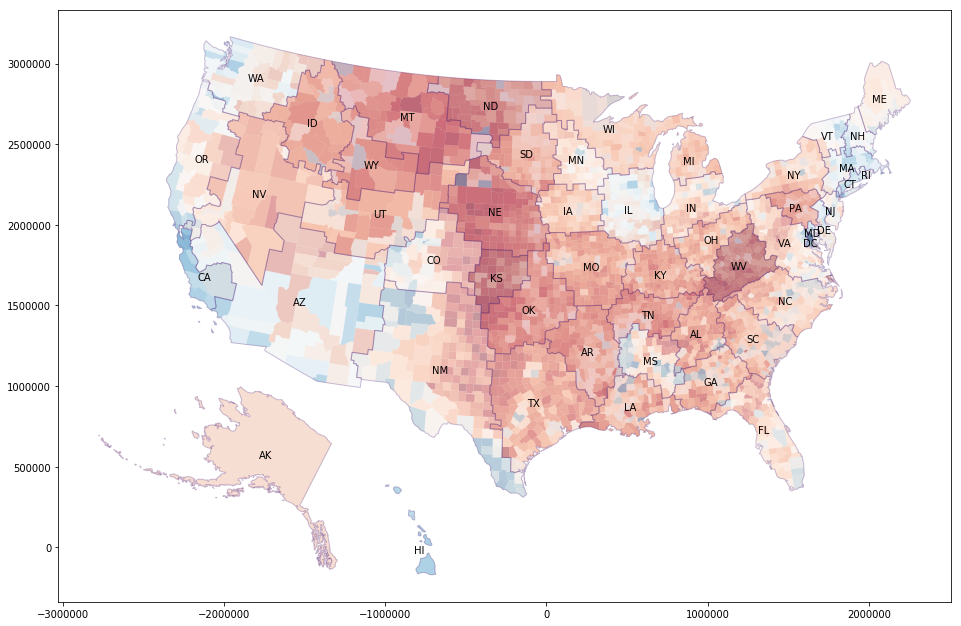

In [30]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_aspect('equal')
for p, t in zip(states.geometry, states.newstate):
    ax.annotate(xy=(p.centroid.x-50000, p.centroid.y-30000), s=t)
qp.quickplot(election, column='goppc', cmap='RdBu_r', linewidth=0.1, edgecolor='w', alpha=0.5)
qp.quickplot(states, column='margin', cmap='RdBu_r', edgecolor='#330066', linewidth=1, facecolor='w', alpha=0.25)